# Lesson 3: Advanced Array Creation Techniques

So in this lesson, we'll learn to generate more complex arrays and manipulate them effectively.
We'll see :
1. np.linspace() which is crucial in feature scaling( transform data to fit a specific range (like between 0 and 1)) and data preprocessing.

2. np.random Some times we have to generate some random numbers between fixed intervals in order to handle complex data.

3. Array stacking and splitting and some random sampling methods.



# What is linspace()?

Let's start with linspace():

  1. it generates evenly spaced values over a specified range
  ### Why is it used?
    2. It's commonly used in scenarios where you want to create a sequence of values between two points for graphing or input to ML models.
  ### What are the parameters involved in it?
    3. start: The starting value of the sequence.
        * stop: The end value of the sequence (included by default).
        * num: Number of samples to generate (default is 50).
        * endpoint: If True (default), stop is included in the output. If False, it’s excluded.
        * retstep: If True, returns (samples, step) instead of just samples.
        * dtype: Type of the output array.
        * axis: The axis in the result along which the linspace samples are stored.

  Got confused of what these are? swipe up !

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
x = np.linspace(0,10,50) #50 equispaced values between 0 to 10
print(x)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


In [5]:
x = np.linspace(10,50,5) # 5 equispaced values between 10 to 50
print(x)

[10. 20. 30. 40. 50.]


In [6]:
y = np.sin(x)
print(y)

[-0.54402111  0.91294525 -0.98803162  0.74511316 -0.26237485]


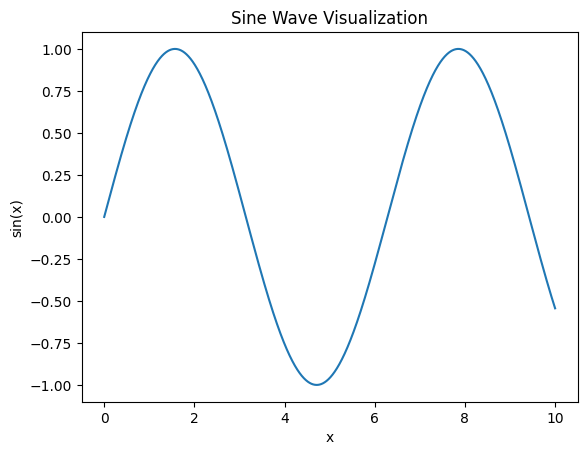

In [13]:
x = np.linspace(0, 10, 10) # observe that if we take just 10 equal spaced values, the graph is not perfect
# x = np.linspace(0,10,50) # it's perfect when it take 50
# x = np.linspace(0,10,300) # try for 300  --> no change ig
y = np.sin(x)

plt.plot(x, y)
plt.title('Sine Wave Visualization')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In ML, we often use np.linspace() to generate evenly spaced values for visualizing model outputs or performance metrics across a range of input values. For example, plotting the model's loss over epochs or decision boundaries of a classifier.

In [17]:
x ,step = np.linspace(0,10,5,retstep=True)
print(x)
print("Here the step size is : ",step)

[ 0.   2.5  5.   7.5 10. ]
Here the step size is :  2.5


Knowing step size is important when you're trying to understand how fine or coarse the intervals are in grid search, parameter exploration, or generating test data for model evaluation.


x * 2 means squaring each element in the x array (this is an element-wise operation).
The resulting array y contains the square of each corresponding value in x.

x[:5] retrieves the first 5 values from the x array.
y[:5] retrieves the first 5 values from the y array (corresponding to the squares of the first 5 x values).


In [18]:
import numpy as np

# Generate data points between -5 and 5, with 100 values
x = np.linspace(-5, 5, 100)
y = x ** 2  # Quadratic function

# Example output (printing first 5 values for brevity)
print(x[:5], y[:5])


[-5.        -4.8989899 -4.7979798 -4.6969697 -4.5959596] [25.         24.00010203 23.02061014 22.06152433 21.12284461]


Creating training or test data for regression problems (e.g., quadratic fitting). It can also be used for model input where a continuous range of values is needed, like generating data for training an autoencoder or regression model.

Perfect for Charts & Graphs 🎨

Let’s say you want a smooth curve to plot a graph. Instead of awkwardly guessing points, linspace just gives you as many as you need, all spaced out evenly.

For Machine Learning 🤖

Training a model and need some dummy data? Or testing how something changes over time? Boom—generate your test values with linspace.

### How linspace is diff from arange?
1. Both arange and linspace are NumPy functions used to create arrays of numbers, but they serve slightly different purposes and have distinct behaviors. Let’s compare them and discuss when to use each.
2. np.arange() :
  * start,stop,step
  * it may or may not include stop
  * We ourself should determine the step size such as np.arange(1,5,0.5) where 0.5 is a step
  * less reliable
3. np.linspace():
  * start,stop,number of points we want
  * stop is mandatory and default
  * it will automatically generate with accurate decimal points
  * more reliable

If you know the exact step size → Use np.arange.

If you know the number of points you need → Use np.linspace.
Ig we are pretty clear about linspace now!

In [25]:
x = np.linspace(10, 50, num=5, endpoint=True, retstep=True, dtype=int) #output in integer format
y = np.linspace(10, 50, num=5, endpoint=True, retstep=True, dtype=float) #output in float format
z = np.linspace(10, 50, num=5, endpoint=False, retstep=False, dtype=int) #It excludes the stop point and generated evenly spaced values before stop point
w = np.linspace(10, 50, num=5, endpoint=True, retstep=False, dtype=int) # It includes stop point since endpoint=True
w1= np.linspace(10, 50, num=5, endpoint=False, retstep=True, dtype=int) # It gives the step size since retstep=True

print(x)
print(y)
print(z)
print(w)
print(w1)

(array([10, 20, 30, 40, 50]), 10.0)
(array([10., 20., 30., 40., 50.]), 10.0)
[10 18 26 34 42]
[10 20 30 40 50]
(array([10, 18, 26, 34, 42]), 8.0)


Ig now you are familiar with all the parameters included in linspace()

# Lets learn ***Random Numbers and Sampling***

np.random.randint() generates random integers from a specified range.
Here, the range is [0,1):
Numbers are from 1 to 9 (inclusive of 1, exclusive of 10).

size=(3, 3) creates a 3x3 matrix (array) of random integers.
Each element is a random integer within the specified range.

In [26]:
uniform = np.random.rand(3, 3)
print("Uniform Random Numbers:\n", uniform)


Uniform Random Numbers:
 [[0.34465258 0.75975517 0.88963851]
 [0.03306871 0.11079677 0.54686744]
 [0.30960431 0.87962983 0.99692707]]


the code above contains the word rand and the code below contains randn which implies that it is a normal distribution where as the above code is a uniform distribution.



  * np.random.randn() generates random numbers from a standard normal distribution.
A normal distribution (or Gaussian distribution) is bell-shaped:
The mean (average) is 0.
The standard deviation (spread) is 1.

  * 3, 3 creates a 3x3 matrix (array) of random numbers.
Most of the numbers are close to 0, with fewer numbers further away from 0.


In [27]:
normal = np.random.randn(3, 3)
print("Normal Distribution:\n", normal)


Normal Distribution:
 [[ 0.44185669 -0.15124179  0.54156665]
 [ 0.50293961 -0.99038299  0.0310091 ]
 [-1.23281341  1.77960214 -1.14850092]]


np.random.randint() generates random integers from a specified range.
Here, the range is [1, 10):
Numbers are from 1 to 9 (inclusive of 1, exclusive of 10).

size=(3, 3) creates a 3x3 matrix (array) of random integers.
Each element is a random integer within the specified range.


In [ ]:
integers = np.random.randint(1, 10, size=(3, 3))
print("Random Integers:\n", integers)


### Permutation of an Array
* A permutation of an array refers to a rearrangement of its elements in a new order. This means the same elements are present, but their positions have changed. The permuted array is just one of the possible ways the elements in the original array can be shuffled.

In [28]:
arr = np.array([1, 2, 3, 4, 5])
permuted = np.random.permutation(arr)
print("Original Array:", arr)
print("Permuted Array:", permuted)


Original Array: [1 2 3 4 5]
Permuted Array: [1 5 2 3 4]


In ML permutation is helpful in :
Shuffling Data: Prevents the model from learning order-based patterns in sequential data (e.g., time-series or sorted datasets).
Cross-Validation: Helps in creating randomized folds for training and validation.

# Array stacking and splitting

In [29]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Horizontal stacking
hstacked = np.hstack((a, b))
print("Horizontally Stacked:", hstacked)

# Vertical stacking
vstacked = np.vstack((a, b))
print("Vertically Stacked:\n", vstacked)


Horizontally Stacked: [1 2 3 4 5 6]
Vertically Stacked:
 [[1 2 3]
 [4 5 6]]


np.hsplit()	Split arrays horizontally (column-wise).
np.vsplit()	Split arrays vertically (row-wise).

In [30]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Horizontal split
hsplit = np.hsplit(arr, 3)
print("Horizontally Split:\n", hsplit)

# Vertical split
vsplit = np.vsplit(arr, 3)
print("Vertically Split:\n", vsplit)


Horizontally Split:
 [array([[1],
       [4],
       [7]]), array([[2],
       [5],
       [8]]), array([[3],
       [6],
       [9]])]
Vertically Split:
 [array([[1, 2, 3]]), array([[4, 5, 6]]), array([[7, 8, 9]])]


ML application:

Train-Test Split: Divide data for training and testing.
Batch Processing: Split data into manageable chunks for iterative training.

In case if you havent loooked at my previous lesson colabs --> check it out at [pranathi000 - github](https://github.com/pranathi000/ML_libraries/tree/main/Numpy)